In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
account = pd.read_csv('ravenstack_accounts.csv')
subs = pd.read_csv('ravenstack_subscriptions.csv')
events = pd.read_csv('ravenstack_churn_events.csv')
feat = pd.read_csv('ravenstack_feature_usage.csv')
support = pd.read_csv('ravenstack_support_tickets.csv')


In [3]:
account.head()

,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,seats,is_trial,churn_flag
0,A-2e4581,Company_0,EdTech,US,16/10/2024,partner,Basic,9,False,False
1,A-43a9e3,Company_1,FinTech,IN,17/08/2023,other,Basic,18,False,True
2,A-0a282f,Company_2,DevTools,US,27/08/2024,organic,Basic,1,False,False
3,A-1f0ac7,Company_3,HealthTech,UK,27/08/2023,other,Basic,24,True,False
4,A-ce550d,Company_4,HealthTech,US,27/10/2024,event,Enterprise,35,False,True


In [4]:
account['signup_date'] = pd.to_datetime(account['signup_date'], format='%d/%m/%Y')

In [5]:
account.head()

,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,seats,is_trial,churn_flag
0,A-2e4581,Company_0,EdTech,US,2024-10-16,partner,Basic,9,False,False
1,A-43a9e3,Company_1,FinTech,IN,2023-08-17,other,Basic,18,False,True
2,A-0a282f,Company_2,DevTools,US,2024-08-27,organic,Basic,1,False,False
3,A-1f0ac7,Company_3,HealthTech,UK,2023-08-27,other,Basic,24,True,False
4,A-ce550d,Company_4,HealthTech,US,2024-10-27,event,Enterprise,35,False,True


In [6]:
account['month'] = account['signup_date'].dt.month_name()
account['year'] = account['signup_date'].dt.year


In [7]:
account.head()

,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,seats,is_trial,churn_flag,month,year
0,A-2e4581,Company_0,EdTech,US,2024-10-16,partner,Basic,9,False,False,October,2024
1,A-43a9e3,Company_1,FinTech,IN,2023-08-17,other,Basic,18,False,True,August,2023
2,A-0a282f,Company_2,DevTools,US,2024-08-27,organic,Basic,1,False,False,August,2024
3,A-1f0ac7,Company_3,HealthTech,UK,2023-08-27,other,Basic,24,True,False,August,2023
4,A-ce550d,Company_4,HealthTech,US,2024-10-27,event,Enterprise,35,False,True,October,2024


In [8]:
## generate revenue for each account id according to year and month from subs table
subs.head()

,subscription_id,account_id,start_date,end_date,plan_tier,seats,mrr_amount,arr_amount,is_trial,upgrade_flag,downgrade_flag,churn_flag,billing_frequency,auto_renew_flag,end_date_lesser_start_date
0,S-8cec59,A-3c1a3f,23/12/2023,12/04/2024,Enterprise,14,2786,33432,False,False,False,True,monthly,True,0
1,S-0f6f44,A-9b9fe9,11/06/2024,NaN,Pro,17,833,9996,False,False,False,False,monthly,True,ok
2,S-51c0d1,A-659280,25/11/2024,NaN,Enterprise,62,0,0,True,True,False,False,annual,False,ok
3,S-f81687,A-e7a1e2,23/11/2024,13/12/2024,Enterprise,5,995,11940,False,False,False,True,monthly,True,0
4,S-cff5a2,A-ba6516,10/01/2024,NaN,Enterprise,27,5373,64476,False,False,False,False,monthly,True,ok


In [9]:
subs['start_date'] = pd.to_datetime(subs['start_date'],format='%d/%m/%Y')

In [10]:
subs['month'] = subs['start_date'].dt.month_name()
subs['year'] = subs['start_date'].dt.year


In [11]:
subs.head()

,subscription_id,account_id,start_date,end_date,plan_tier,seats,mrr_amount,arr_amount,is_trial,upgrade_flag,downgrade_flag,churn_flag,billing_frequency,auto_renew_flag,end_date_lesser_start_date,month,year
0,S-8cec59,A-3c1a3f,2023-12-23,12/04/2024,Enterprise,14,2786,33432,False,False,False,True,monthly,True,0,December,2023
1,S-0f6f44,A-9b9fe9,2024-06-11,NaN,Pro,17,833,9996,False,False,False,False,monthly,True,ok,June,2024
2,S-51c0d1,A-659280,2024-11-25,NaN,Enterprise,62,0,0,True,True,False,False,annual,False,ok,November,2024
3,S-f81687,A-e7a1e2,2024-11-23,13/12/2024,Enterprise,5,995,11940,False,False,False,True,monthly,True,0,November,2024
4,S-cff5a2,A-ba6516,2024-01-10,NaN,Enterprise,27,5373,64476,False,False,False,False,monthly,True,ok,January,2024


In [12]:
mrr_amount = subs.groupby(['account_id'])['mrr_amount'].agg(['sum', 'mean','max']).reset_index()
mrr_amount = mrr_amount.rename(columns={
    'sum': 'observed_mrr_2023_2024',
    'mean': 'avg_mrr',
    'max': 'max_mrr'
})

In [13]:
mrr_amount

,account_id,observed_mrr_2023_2024,avg_mrr,max_mrr
0,A-00bed1,33506,3350.600000,9751
1,A-00cac8,14121,1569.000000,7761
2,A-0158bb,4070,678.333333,2205
3,A-016043,16516,1501.454545,4776
4,A-019782,8353,928.111111,3184
...,...,...,...,...
495,A-fe79a5,13532,1353.200000,4577
496,A-ff3c73,4335,481.666667,1254
497,A-ff79f2,27873,3097.000000,16517
498,A-ffc04f,20039,1335.933333,3781


In [14]:
seats = subs.groupby(['account_id'])['seats'].agg(['mean']).reset_index()
seats = seats.rename(columns={
    'mean': 'avg_seats'
})

In [15]:
acc = account.copy()

In [16]:
acc.head()

,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,seats,is_trial,churn_flag,month,year
0,A-2e4581,Company_0,EdTech,US,2024-10-16,partner,Basic,9,False,False,October,2024
1,A-43a9e3,Company_1,FinTech,IN,2023-08-17,other,Basic,18,False,True,August,2023
2,A-0a282f,Company_2,DevTools,US,2024-08-27,organic,Basic,1,False,False,August,2024
3,A-1f0ac7,Company_3,HealthTech,UK,2023-08-27,other,Basic,24,True,False,August,2023
4,A-ce550d,Company_4,HealthTech,US,2024-10-27,event,Enterprise,35,False,True,October,2024


In [17]:
acc_subs  = acc.merge(mrr_amount, on='account_id', how='left')

In [18]:
df = acc_subs.merge(seats, on='account_id', how='left')
df.head()

,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,seats,is_trial,churn_flag,month,year,observed_mrr_2023_2024,avg_mrr,max_mrr,avg_seats
0,A-2e4581,Company_0,EdTech,US,2024-10-16,partner,Basic,9,False,False,October,2024,12603,1260.300000,5771,31.200000
1,A-43a9e3,Company_1,FinTech,IN,2023-08-17,other,Basic,18,False,True,August,2023,10004,1250.500000,5572,22.000000
2,A-0a282f,Company_2,DevTools,US,2024-08-27,organic,Basic,1,False,False,August,2024,18286,1219.066667,5771,18.800000
3,A-1f0ac7,Company_3,HealthTech,UK,2023-08-27,other,Basic,24,True,False,August,2023,9275,1325.000000,4776,29.857143
4,A-ce550d,Company_4,HealthTech,US,2024-10-27,event,Enterprise,35,False,True,October,2024,48761,5417.888889,21691,47.111111


In [19]:
support

,ticket_id,account_id,submitted_at,closed_at,resolution_time_hours,priority,first_response_time_minutes,satisfaction_score,cleaned_satisfaction_Score,escalation_flag,submitted_at_greater_closed_at_flag,negative_resolution_time_flag
0,T-0024de,A-712f1c,27/07/2023,28/07/2023 03:00,27,high,74,NaN,NaN,False,0,0
1,T-4d04b9,A-e43bf7,08/07/2024,09/07/2024 03:00,27,urgent,144,NaN,NaN,False,0,0
2,T-d5e12f,A-0f3e88,17/10/2024,17/10/2024 19:00,19,urgent,93,4.0,4.0,False,0,0
3,T-dfce9a,A-4c56c9,08/09/2024,09/09/2024 23:00,47,medium,126,5.0,5.0,False,0,0
4,T-c59f77,A-6f8ad2,30/11/2024,01/12/2024 02:00,26,medium,8,NaN,NaN,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,T-d9d697,A-417d2f,06/11/2024,08/11/2024 22:00,70,urgent,3,NaN,NaN,False,0,0
1996,T-a9918a,A-b20d99,12/02/2023,14/02/2023 15:00,63,low,22,3.0,3.0,False,0,0
1997,T-e3c91a,A-d3c88e,29/04/2023,02/05/2023 00:00,72,high,16,4.0,4.0,False,0,0
1998,T-91c983,A-dfbd31,23/05/2023,23/05/2023 03:00,3,high,177,5.0,5.0,False,0,0


In [20]:
df = df.drop(columns=['seats','month','year'])

In [21]:
df.tail()

,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,is_trial,churn_flag,observed_mrr_2023_2024,avg_mrr,max_mrr,avg_seats
495,A-8ae3fc,Company_495,DevTools,CA,2024-06-28,ads,Pro,False,False,4447,555.875000,1666,27.625000
496,A-55f257,Company_496,FinTech,US,2023-12-21,organic,Basic,False,False,12137,1213.700000,4577,18.800000
497,A-d26ab4,Company_497,DevTools,UK,2024-11-07,organic,Basic,False,True,16613,1845.888889,6567,22.444444
498,A-712533,Company_498,EdTech,US,2023-07-31,organic,Pro,False,False,19382,1615.166667,3582,28.416667
499,A-781cc0,Company_499,EdTech,US,2024-09-04,organic,Pro,False,False,18315,1144.687500,4378,16.562500


In [22]:
# The df table will be used for k-means segmentation. Since k-means segmentation primarily deals with single account_id and single row values 


## Exploratory Data Analysis

### 1.How is customer value distributed across the customer base?

<Axes: xlabel='observed_mrr_2023_2024', ylabel='Count'>

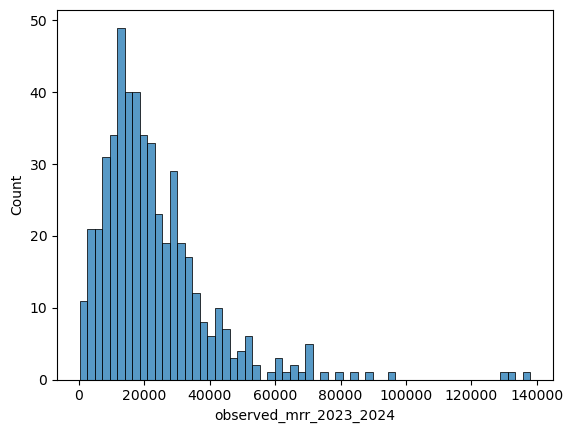

In [23]:
#distribution of observed_mrr_2023_2024
sns.histplot(data=df, x='observed_mrr_2023_2024', bins=60)

#### observed a right skewed data, expected since few accounts might be contributing the most

<Axes: xlabel='observed_mrr_2023_2024'>

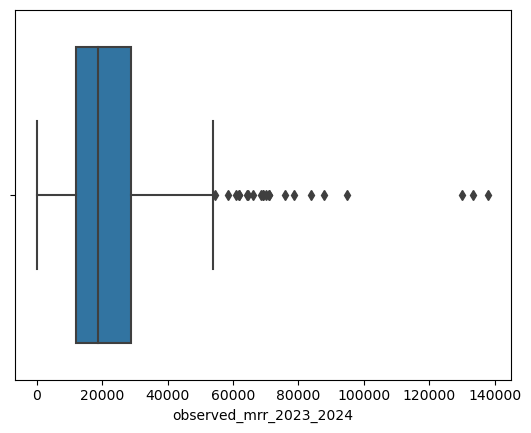

In [24]:
sns.boxplot(data=df, x='observed_mrr_2023_2024')

In [25]:
print('Mean of observed MRR 2023-2024: ',df['observed_mrr_2023_2024'].mean())
print('Median of observed MRR 2023-2024: ',df['observed_mrr_2023_2024'].median())

df['observed_mrr_2023_2024'].quantile([0.5,0.7, 0.90, 0.95])

Mean of observed MRR 2023-2024:  22677.494
Median of observed MRR 2023-2024:  18833.5


0.50    18833.50
0.70    26649.10
0.90    42126.70
0.95    52092.55
Name: observed_mrr_2023_2024, dtype: float64

In [26]:
df['observed_mrr_2023_2024'].describe()

count       500.000000
mean      22677.494000
std       17294.852405
min         190.000000
25%       11884.250000
50%       18833.500000
75%       28874.750000
max      138060.000000
Name: observed_mrr_2023_2024, dtype: float64

#### mean is greater than median so slightly right skewed.

In [27]:
## caluclate the top % customers contribting 80% to the company revenue
total_mrr  = df['observed_mrr_2023_2024'].sum()
total_mrr

11338747

In [28]:
df_sorted  = df.sort_values(by='observed_mrr_2023_2024', ascending=False)
df_sorted

,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,is_trial,churn_flag,observed_mrr_2023_2024,avg_mrr,max_mrr,avg_seats
403,A-d4e0d4,Company_403,FinTech,US,2024-10-18,other,Basic,False,False,138060,13806.000000,23283,117.000000
166,A-5b1bcd,Company_166,DevTools,US,2023-09-16,organic,Pro,False,False,133298,8886.533333,14527,73.000000
358,A-5a215a,Company_358,EdTech,FR,2024-01-05,other,Enterprise,False,False,130152,7230.666667,17313,87.000000
368,A-1f0636,Company_368,EdTech,AU,2024-01-01,partner,Pro,False,False,94710,8610.000000,20895,105.000000
337,A-4814a3,Company_337,Cybersecurity,IN,2024-09-17,event,Basic,False,True,87957,7996.090909,17313,87.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,A-bf7919,Company_426,HealthTech,US,2024-11-27,organic,Pro,False,False,1560,260.000000,735,9.833333
454,A-0be015,Company_454,FinTech,US,2024-10-15,event,Pro,False,False,1178,235.600000,456,21.400000
35,A-44dc83,Company_35,EdTech,FR,2024-05-12,other,Basic,False,False,456,114.000000,456,22.750000
434,A-1e6fc3,Company_434,EdTech,FR,2023-12-06,other,Pro,False,False,444,111.000000,245,4.500000


In [29]:

df_sorted['cum_sum_pct'] = round((df_sorted['observed_mrr_2023_2024'].cumsum()/ total_mrr )*100,2)

In [30]:
df_sorted.head(150)

,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,is_trial,churn_flag,observed_mrr_2023_2024,avg_mrr,max_mrr,avg_seats,cum_sum_pct
403,A-d4e0d4,Company_403,FinTech,US,2024-10-18,other,Basic,False,False,138060,13806.000000,23283,117.000000,1.22
166,A-5b1bcd,Company_166,DevTools,US,2023-09-16,organic,Pro,False,False,133298,8886.533333,14527,73.000000,2.39
358,A-5a215a,Company_358,EdTech,FR,2024-01-05,other,Enterprise,False,False,130152,7230.666667,17313,87.000000,3.54
368,A-1f0636,Company_368,EdTech,AU,2024-01-01,partner,Pro,False,False,94710,8610.000000,20895,105.000000,4.38
337,A-4814a3,Company_337,Cybersecurity,IN,2024-09-17,event,Basic,False,True,87957,7996.090909,17313,87.000000,5.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,A-1986ca,Company_197,HealthTech,IN,2023-01-30,ads,Pro,False,False,27661,3951.571429,6169,22.714286,54.67
364,A-d4ac0e,Company_364,DevTools,UK,2024-04-20,ads,Basic,False,False,27557,1450.368421,5572,29.473684,54.91
85,A-157070,Company_85,FinTech,US,2023-11-09,ads,Pro,False,False,27506,1719.125000,6965,24.750000,55.16
332,A-3793ee,Company_332,Cybersecurity,CA,2023-03-21,organic,Enterprise,True,False,26705,3815.000000,9751,49.000000,55.39


In [31]:
#Number of customers who make up to 80% of revenue 
df_sorted_80 = df_sorted[df_sorted['cum_sum_pct']<=80].shape[0]+1
df_sorted_80

280

In [32]:
#percebtage of customers who make up to 80% of total revenue
round((df_sorted_80/df_sorted.shape[0])*100,2)

56.0

### Insights
1. Right-skewed distribution: Customer value is unevenly distributed, with a long tail of higher-value customers pulling the average upward.
2. A classic Pareto (80/20) would be: ~20% customers → ~80% value but 56% customers → 80% value suggests that Value is skewed, but not extremely concentrated. This is not a whale-driven business. The business cannot rely solely on protecting a small elite group; churn among mid-value customers can materially impact revenue.
3. Mean: 22,677, Median: 18,833, Difference: ~3,844, Relative difference: ~20%. There is presence of higher-value customers inflating the average. But again: not extreme skewed
4. Percentile Explanation:
--> 50th percentile (median): 18,833 - Half of customers generate ≤ 18.8k in observed value
--> 70th percentile: 26,649 - Top 30% of customers generate more than 26.6k
--> 90th percentile: 42,126 - Top 10% of customers generate more than 42.1k
--> 95th percentile: 52,093 - Top 5% generate more than 52k
Look at the jumps:

50% → 70%: ~+7.8k

70% → 90%: ~+15.5k

90% → 95%: ~+10k (for just 5% of customers)
Business interpretation:

The top 30% are materially more valuable than the bottom 70%

The top 10% are disproportionately valuable

### How this should influence your segmentation (very important)

These percentiles give you data-driven value bands.
You should not invent arbitrary cut-offs.

Recommended value bands (use these going forward)

1. Low value: ≤ 50th percentile (≤ 18.8k)

2. Mid value: 50th–70th percentile (18.8k – 26.6k)

3. High value: 70th–90th percentile (26.6k – 42.1k)

5. Very high value: ≥ 90th percentile (> 42.1k)

## 2. Churn vs value across percentile brands

In [33]:
## attach value bands to the dataset based on te percentiles
def value_band(x):
    if x <= 18800:
        return "Low Value"
    elif x >18800 and x<= 26600:
        return "Mid Value"
    elif x> 26600 and x<=42100:
        return "High Value"
    elif x> 42100:
        return "Very High Value"
    else:
        "NA"  

In [34]:
df_sorted['value_band']=df_sorted['observed_mrr_2023_2024'].apply(value_band)

In [35]:
df_sorted

,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,is_trial,churn_flag,observed_mrr_2023_2024,avg_mrr,max_mrr,avg_seats,cum_sum_pct,value_band
403,A-d4e0d4,Company_403,FinTech,US,2024-10-18,other,Basic,False,False,138060,13806.000000,23283,117.000000,1.22,Very High Value
166,A-5b1bcd,Company_166,DevTools,US,2023-09-16,organic,Pro,False,False,133298,8886.533333,14527,73.000000,2.39,Very High Value
358,A-5a215a,Company_358,EdTech,FR,2024-01-05,other,Enterprise,False,False,130152,7230.666667,17313,87.000000,3.54,Very High Value
368,A-1f0636,Company_368,EdTech,AU,2024-01-01,partner,Pro,False,False,94710,8610.000000,20895,105.000000,4.38,Very High Value
337,A-4814a3,Company_337,Cybersecurity,IN,2024-09-17,event,Basic,False,True,87957,7996.090909,17313,87.000000,5.15,Very High Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,A-bf7919,Company_426,HealthTech,US,2024-11-27,organic,Pro,False,False,1560,260.000000,735,9.833333,99.98,Low Value
454,A-0be015,Company_454,FinTech,US,2024-10-15,event,Pro,False,False,1178,235.600000,456,21.400000,99.99,Low Value
35,A-44dc83,Company_35,EdTech,FR,2024-05-12,other,Basic,False,False,456,114.000000,456,22.750000,99.99,Low Value
434,A-1e6fc3,Company_434,EdTech,FR,2023-12-06,other,Pro,False,False,444,111.000000,245,4.500000,100.00,Low Value


In [36]:


# are high-value customers more or least likely to churn?
df_sorted['value_band'].value_counts()

value_band
Low Value          249
High Value         103
Mid Value           98
Very High Value     50
Name: count, dtype: int64

customer volumn is firstly in low value band then followed by high value , then mid- value and finally very few high value customers

In [37]:
df_sorted['churn_flag'].value_counts(normalize=True)*100

churn_flag
False    78.0
True     22.0
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Customer Count by Value Tier and Churn Status')

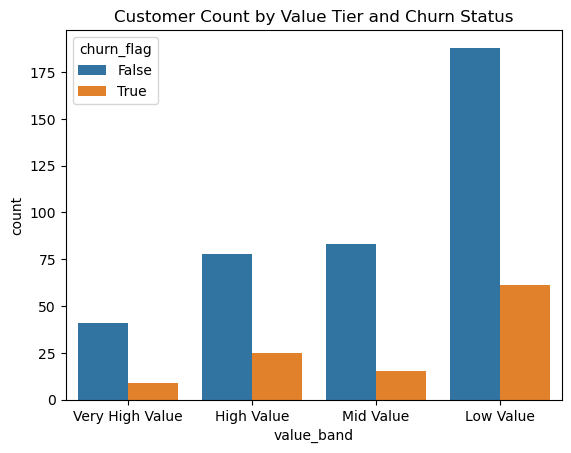

In [38]:
sns.countplot(data=df_sorted, x='value_band', hue='churn_flag' )
plt.title("Customer Count by Value Tier and Churn Status")

In [39]:
#Profile Analysis: Distribution of Churners Across Value Bands
cross_tab = pd.crosstab(index=df_sorted['value_band'], columns=df_sorted['churn_flag'], normalize='columns')*100
cross_tab

churn_flag,False,True
value_band,,
High Value,20.000000,22.727273
Low Value,48.205128,55.454545
Mid Value,21.282051,13.636364
Very High Value,10.512821,8.181818


Volume insight : 55% of churned customers are low-value

22% are high-value

14% are mid-value

8% are very high-value
Customer churn is numerically concentrated in the low-value segment, which contributes the majority of churned accounts.

In [40]:
# how much revenue is lost in each brand
cross_tab = pd.crosstab(index=df_sorted['value_band'],values =df_sorted['observed_mrr_2023_2024'], columns=df_sorted['churn_flag'], normalize='columns', aggfunc='sum')*100
cross_tab

churn_flag,False,True
value_band,,
High Value,28.373323,33.551202
Low Value,22.871203,30.880227
Mid Value,20.486109,13.980711
Very High Value,28.269365,21.587860


Distribution of revenue loss: 34% of revenue loss comes from high-value customers

30% from low-value

22% from very high-value

14% from mid-value

Revenue loss due to churn is not aligned with churn volume and is disproportionately driven by high- and very high-value customers


### How much revenue is lost when customers churn in each value band?

In [41]:
df_sorted['churned_mrr'] = df_sorted['churn_flag']* df['observed_mrr_2023_2024']
df_sorted

,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,is_trial,churn_flag,observed_mrr_2023_2024,avg_mrr,max_mrr,avg_seats,cum_sum_pct,value_band,churned_mrr
403,A-d4e0d4,Company_403,FinTech,US,2024-10-18,other,Basic,False,False,138060,13806.000000,23283,117.000000,1.22,Very High Value,0
166,A-5b1bcd,Company_166,DevTools,US,2023-09-16,organic,Pro,False,False,133298,8886.533333,14527,73.000000,2.39,Very High Value,0
358,A-5a215a,Company_358,EdTech,FR,2024-01-05,other,Enterprise,False,False,130152,7230.666667,17313,87.000000,3.54,Very High Value,0
368,A-1f0636,Company_368,EdTech,AU,2024-01-01,partner,Pro,False,False,94710,8610.000000,20895,105.000000,4.38,Very High Value,0
337,A-4814a3,Company_337,Cybersecurity,IN,2024-09-17,event,Basic,False,True,87957,7996.090909,17313,87.000000,5.15,Very High Value,87957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,A-bf7919,Company_426,HealthTech,US,2024-11-27,organic,Pro,False,False,1560,260.000000,735,9.833333,99.98,Low Value,0
454,A-0be015,Company_454,FinTech,US,2024-10-15,event,Pro,False,False,1178,235.600000,456,21.400000,99.99,Low Value,0
35,A-44dc83,Company_35,EdTech,FR,2024-05-12,other,Basic,False,False,456,114.000000,456,22.750000,99.99,Low Value,0
434,A-1e6fc3,Company_434,EdTech,FR,2023-12-06,other,Pro,False,False,444,111.000000,245,4.500000,100.00,Low Value,0


In [42]:
# revenenue and customer loss within the value band 

In [43]:
summary_churn = df_sorted.groupby(['value_band']).agg(total_customers=('account_id','count'),
                                                      total_mrr=('observed_mrr_2023_2024','sum'),
                                                     churned_customers_within_band =('churn_flag','sum')).reset_index()
summary_churn
churned_rev_within_band = df_sorted[df_sorted['churn_flag'] == 1].groupby('value_band')['observed_mrr_2023_2024'].sum()
summary_churn['churned_revenue_within_band'] = summary_churn['value_band'].map(churned_rev_within_band)
summary_churn

,value_band,total_customers,total_mrr,churned_customers_within_band,churned_revenue_within_band
0,High Value,103,3339131,25,790213
1,Low Value,249,2781940,61,727305
2,Mid Value,98,2169650,15,329280
3,Very High Value,50,3048026,9,508447


In [44]:
#Compare customer churn and revenue loss "within" value band
summary_churn['pct_customer_churn_within_band'] =  (summary_churn['churned_customers_within_band']/summary_churn['total_customers']) *100
summary_churn['pct_revenue_churn_within_band'] =  (summary_churn['churned_revenue_within_band']/summary_churn['total_mrr']) *100
summary_churn

,value_band,total_customers,total_mrr,churned_customers_within_band,churned_revenue_within_band,pct_customer_churn_within_band,pct_revenue_churn_within_band
0,High Value,103,3339131,25,790213,24.271845,23.665229
1,Low Value,249,2781940,61,727305,24.497992,26.143806
2,Mid Value,98,2169650,15,329280,15.306122,15.176641
3,Very High Value,50,3048026,9,508447,18.000000,16.681190


Churn is a volume problem in low-value segments but a value problem in high-value segments, where fewer churn events result in disproportionately higher revenue loss.

In [45]:
##revenue loss in total?
total_business_revenue = df_sorted['observed_mrr_2023_2024'].sum()

summary_churn['pct_total_revenue_lost'] = (
    summary_churn['churned_revenue_within_band'] / total_business_revenue
) * 100
summary_churn

,value_band,total_customers,total_mrr,churned_customers_within_band,churned_revenue_within_band,pct_customer_churn_within_band,pct_revenue_churn_within_band,pct_total_revenue_lost
0,High Value,103,3339131,25,790213,24.271845,23.665229,6.969139
1,Low Value,249,2781940,61,727305,24.497992,26.143806,6.414333
2,Mid Value,98,2169650,15,329280,15.306122,15.176641,2.904025
3,Very High Value,50,3048026,9,508447,18.000000,16.681190,4.484155


In [46]:

total_churned_revenue = summary_churn['churned_revenue_within_band'].sum()

summary_churn['pct_churned_revenue_distribution'] = (
    summary_churn['churned_revenue_within_band'] / total_churned_revenue
) * 100
summary_churn

,value_band,total_customers,total_mrr,churned_customers_within_band,churned_revenue_within_band,pct_customer_churn_within_band,pct_revenue_churn_within_band,pct_total_revenue_lost,pct_churned_revenue_distribution
0,High Value,103,3339131,25,790213,24.271845,23.665229,6.969139,33.551202
1,Low Value,249,2781940,61,727305,24.497992,26.143806,6.414333,30.880227
2,Mid Value,98,2169650,15,329280,15.306122,15.176641,2.904025,13.980711
3,Very High Value,50,3048026,9,508447,18.000000,16.681190,4.484155,21.587860


Across-business impact (headline)

pct_total_revenue_lost

High value: 7% of total bsuiness loss

Low value: 6%

Very high value: 4%

Mid value: 3%

Distribution of churned revenue (supporting)

High value: 33%

Low value: 30%

Very high value: 21%

Mid value: remaining %

Insights:
Low value: highest churn rate

High / very high value: lower churn rate but higher per-customer impact

Retention efforts should prioritise protecting high-value customers to minimise revenue loss, while separately addressing churn volume among low-value customers through scalable interventions.

## 3. Descriptive Segmentation (Who Are These Customers?)

In [47]:
#Which observable customer characteristics are associated with high value, high churn, and high revenue loss?
df_sorted
#indistry, plan_tier, country, referal source

,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,is_trial,churn_flag,observed_mrr_2023_2024,avg_mrr,max_mrr,avg_seats,cum_sum_pct,value_band,churned_mrr
403,A-d4e0d4,Company_403,FinTech,US,2024-10-18,other,Basic,False,False,138060,13806.000000,23283,117.000000,1.22,Very High Value,0
166,A-5b1bcd,Company_166,DevTools,US,2023-09-16,organic,Pro,False,False,133298,8886.533333,14527,73.000000,2.39,Very High Value,0
358,A-5a215a,Company_358,EdTech,FR,2024-01-05,other,Enterprise,False,False,130152,7230.666667,17313,87.000000,3.54,Very High Value,0
368,A-1f0636,Company_368,EdTech,AU,2024-01-01,partner,Pro,False,False,94710,8610.000000,20895,105.000000,4.38,Very High Value,0
337,A-4814a3,Company_337,Cybersecurity,IN,2024-09-17,event,Basic,False,True,87957,7996.090909,17313,87.000000,5.15,Very High Value,87957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,A-bf7919,Company_426,HealthTech,US,2024-11-27,organic,Pro,False,False,1560,260.000000,735,9.833333,99.98,Low Value,0
454,A-0be015,Company_454,FinTech,US,2024-10-15,event,Pro,False,False,1178,235.600000,456,21.400000,99.99,Low Value,0
35,A-44dc83,Company_35,EdTech,FR,2024-05-12,other,Basic,False,False,456,114.000000,456,22.750000,99.99,Low Value,0
434,A-1e6fc3,Company_434,EdTech,FR,2023-12-06,other,Pro,False,False,444,111.000000,245,4.500000,100.00,Low Value,0


In [48]:
total_customers = df_sorted.shape[0]
total_customers

500

In [49]:
total_business_revenue = df_sorted['observed_mrr_2023_2024'].sum()
total_business_revenue

11338747

In [50]:
# summary table for industry, country, referral_source, plan_tier
#Customer churn rate should be within the segment
#Revenue loss should be framed from an overall business impact perspective
cols =['industry', 'country', 'referral_source', 'plan_tier']
for i in cols:
    summary = df_sorted.groupby(i).agg(customers=('account_id','count'), median_mrr=('observed_mrr_2023_2024','median'),
                            customer_churn=('churn_flag','sum')).reset_index()
    
    summary['customer_share'] = (summary['customers']/total_customers)*100
    summary['churn_rate'] = (summary['customer_churn']/summary['customers'])*100
    
    churned_rev = df_sorted[df_sorted['churn_flag'] == 1].groupby(i)['observed_mrr_2023_2024'].sum()
    summary['overall_revenue_loss'] = summary[i].map(churned_rev)
    summary['pct_overall_revenue_loss'] = (summary['overall_revenue_loss']/ total_business_revenue)*100
    
    print(f"Summary of {i}")
    display(summary)

Summary of industry


,industry,customers,median_mrr,customer_churn,customer_share,churn_rate,overall_revenue_loss,pct_overall_revenue_loss
0,Cybersecurity,100,19314.5,16,20.0,16.000000,451232,3.979558
1,DevTools,113,18132.0,35,22.6,30.973451,619317,5.461953
2,EdTech,79,18315.0,13,15.8,16.455696,282851,2.494553
3,FinTech,112,21132.0,25,22.4,22.321429,545717,4.812851
4,HealthTech,96,17077.0,21,19.2,21.875000,456128,4.022737


Summary of country


,country,customers,median_mrr,customer_churn,customer_share,churn_rate,overall_revenue_loss,pct_overall_revenue_loss
0,AU,32,20814.0,4,6.4,12.500000,131146,1.156618
1,CA,23,16520.0,4,4.6,17.391304,74614,0.658044
2,DE,25,13295.0,8,5.0,32.000000,121722,1.073505
3,FR,22,16436.0,5,4.4,22.727273,50398,0.444476
4,IN,49,21450.0,10,9.8,20.408163,322898,2.847740
5,UK,58,16744.0,11,11.6,18.965517,192951,1.701696
6,US,291,19379.0,68,58.2,23.367698,1461516,12.889572


Summary of referral_source


,referral_source,customers,median_mrr,customer_churn,customer_share,churn_rate,overall_revenue_loss,pct_overall_revenue_loss
0,ads,98,17877.0,23,19.6,23.469388,408135,3.599472
1,event,96,18219.5,29,19.2,30.208333,727285,6.414157
2,organic,114,19939.0,20,22.8,17.543860,432161,3.811365
3,other,103,17884.0,25,20.6,24.271845,484887,4.276372
4,partner,89,20475.0,13,17.8,14.606742,302777,2.670286


Summary of plan_tier


,plan_tier,customers,median_mrr,customer_churn,customer_share,churn_rate,overall_revenue_loss,pct_overall_revenue_loss
0,Basic,168,18998.5,37,33.6,22.023810,926083,8.167419
1,Enterprise,154,17213.0,34,30.8,22.077922,674523,5.948832
2,Pro,178,18993.0,39,35.6,21.910112,754639,6.655400


###  Industry:
FinTech customers exhibit the highest median customer value, indicating strong monetisation, while DevTools accounts contribute the largest share of revenue loss due to churn, driven by a combination of higher churn rates and meaningful customer value.

###  Plan tier:
Differences in revenue loss across plan tiers appear to be driven more by customer volume than by materially different churn behaviour or per-customer value, suggesting plan tier alone is not a strong differentiator of retention risk.

### Country segmentation:
Revenue loss is heavily concentrated in the US due to customer scale, while India exhibits disproportionate revenue risk driven by higher per-customer value despite a smaller customer base.Denmark has highest churn despite lower customer count.

### referal-source:
Event-based acquisition drives the highest churn and revenue loss, suggesting lower long-term customer quality, whereas partner-sourced customers demonstrate stronger retention and higher value, indicating a more sustainable acquisition channel.

## 4. Behavioural Signals (Why churn happened?)

Revenue loss is heavily concentrated in the US due to customer scale, while India exhibits disproportionate revenue risk driven by higher per-customer value despite a smaller customer base.

Do churned customers raise more tickets?

Is churn associated with unresolved or frequent issues?

Are high-value churned customers more support-heavy?

In [51]:
support

,ticket_id,account_id,submitted_at,closed_at,resolution_time_hours,priority,first_response_time_minutes,satisfaction_score,cleaned_satisfaction_Score,escalation_flag,submitted_at_greater_closed_at_flag,negative_resolution_time_flag
0,T-0024de,A-712f1c,27/07/2023,28/07/2023 03:00,27,high,74,NaN,NaN,False,0,0
1,T-4d04b9,A-e43bf7,08/07/2024,09/07/2024 03:00,27,urgent,144,NaN,NaN,False,0,0
2,T-d5e12f,A-0f3e88,17/10/2024,17/10/2024 19:00,19,urgent,93,4.0,4.0,False,0,0
3,T-dfce9a,A-4c56c9,08/09/2024,09/09/2024 23:00,47,medium,126,5.0,5.0,False,0,0
4,T-c59f77,A-6f8ad2,30/11/2024,01/12/2024 02:00,26,medium,8,NaN,NaN,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,T-d9d697,A-417d2f,06/11/2024,08/11/2024 22:00,70,urgent,3,NaN,NaN,False,0,0
1996,T-a9918a,A-b20d99,12/02/2023,14/02/2023 15:00,63,low,22,3.0,3.0,False,0,0
1997,T-e3c91a,A-d3c88e,29/04/2023,02/05/2023 00:00,72,high,16,4.0,4.0,False,0,0
1998,T-91c983,A-dfbd31,23/05/2023,23/05/2023 03:00,3,high,177,5.0,5.0,False,0,0


In [52]:
df_support = support.groupby('account_id').agg(tickets=('ticket_id','count'),
                                 avg_resolution_time_hr=('resolution_time_hours','mean'),
                                 num_escalation_flags=('escalation_flag','sum'),
                                 urgent_flags =('priority',lambda x: (x=='urgent').sum()))
df_support

,tickets,avg_resolution_time_hr,num_escalation_flags,urgent_flags
account_id,,,,
A-00bed1,4,31.750000,0,2
A-00cac8,2,33.000000,0,2
A-0158bb,1,32.000000,0,1
A-016043,3,30.333333,0,0
A-019782,2,10.000000,0,2
...,...,...,...,...
A-fdfc91,5,28.800000,0,4
A-fe79a5,4,28.500000,0,0
A-ff3c73,2,35.500000,0,1


In [53]:
acct_sup=  df_sorted.merge(df_support, on='account_id', how='left')
acct_sup

,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,is_trial,churn_flag,observed_mrr_2023_2024,avg_mrr,max_mrr,avg_seats,cum_sum_pct,value_band,churned_mrr,tickets,avg_resolution_time_hr,num_escalation_flags,urgent_flags
0,A-d4e0d4,Company_403,FinTech,US,2024-10-18,other,Basic,False,False,138060,13806.000000,23283,117.000000,1.22,Very High Value,0,4.0,39.250000,0.0,0.0
1,A-5b1bcd,Company_166,DevTools,US,2023-09-16,organic,Pro,False,False,133298,8886.533333,14527,73.000000,2.39,Very High Value,0,4.0,43.250000,0.0,3.0
2,A-5a215a,Company_358,EdTech,FR,2024-01-05,other,Enterprise,False,False,130152,7230.666667,17313,87.000000,3.54,Very High Value,0,4.0,29.500000,0.0,2.0
3,A-1f0636,Company_368,EdTech,AU,2024-01-01,partner,Pro,False,False,94710,8610.000000,20895,105.000000,4.38,Very High Value,0,2.0,38.500000,0.0,0.0
4,A-4814a3,Company_337,Cybersecurity,IN,2024-09-17,event,Basic,False,True,87957,7996.090909,17313,87.000000,5.15,Very High Value,87957,4.0,18.750000,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,A-bf7919,Company_426,HealthTech,US,2024-11-27,organic,Pro,False,False,1560,260.000000,735,9.833333,99.98,Low Value,0,2.0,14.500000,0.0,0.0
496,A-0be015,Company_454,FinTech,US,2024-10-15,event,Pro,False,False,1178,235.600000,456,21.400000,99.99,Low Value,0,7.0,40.285714,1.0,2.0
497,A-44dc83,Company_35,EdTech,FR,2024-05-12,other,Basic,False,False,456,114.000000,456,22.750000,99.99,Low Value,0,7.0,40.857143,0.0,1.0
498,A-1e6fc3,Company_434,EdTech,FR,2023-12-06,other,Pro,False,False,444,111.000000,245,4.500000,100.00,Low Value,0,5.0,23.800000,0.0,1.0


In [54]:
subs_feat = subs.merge(feat, on='subscription_id', how='left')
subs_feat.columns

Index(['subscription_id', 'account_id', 'start_date', 'end_date', 'plan_tier',
       'seats', 'mrr_amount', 'arr_amount', 'is_trial', 'upgrade_flag',
       'downgrade_flag', 'churn_flag', 'billing_frequency', 'auto_renew_flag',
       'end_date_lesser_start_date', 'month', 'year', 'usage_id', 'usage_date',
       'feature_name', 'usage_count', 'usage_duration_secs', 'error_count',
       'is_beta_feature', 'negative_usage_count_flag',
       'negative_usage_duration_flag'],
      dtype='object')

In [55]:
subs_feat.drop(columns =['churn_flag'], inplace=True)

In [56]:
subs_feat

,subscription_id,account_id,start_date,end_date,plan_tier,seats,mrr_amount,arr_amount,is_trial,upgrade_flag,...,year,usage_id,usage_date,feature_name,usage_count,usage_duration_secs,error_count,is_beta_feature,negative_usage_count_flag,negative_usage_duration_flag
0,S-8cec59,A-3c1a3f,2023-12-23,12/04/2024,Enterprise,14,2786,33432,False,False,...,2023,U-ee0af2,21/06/2024,feature_32,15.0,8670.0,1.0,True,0.0,0.0
1,S-8cec59,A-3c1a3f,2023-12-23,12/04/2024,Enterprise,14,2786,33432,False,False,...,2023,U-eebc9c,01/03/2024,feature_5,6.0,1308.0,0.0,False,0.0,0.0
2,S-8cec59,A-3c1a3f,2023-12-23,12/04/2024,Enterprise,14,2786,33432,False,False,...,2023,U-4cc6e9,06/10/2024,feature_11,10.0,330.0,1.0,False,0.0,0.0
3,S-8cec59,A-3c1a3f,2023-12-23,12/04/2024,Enterprise,14,2786,33432,False,False,...,2023,U-e22a1b,03/12/2023,feature_40,5.0,2475.0,0.0,False,0.0,0.0
4,S-8cec59,A-3c1a3f,2023-12-23,12/04/2024,Enterprise,14,2786,33432,False,False,...,2023,U-3fbbbc,14/07/2023,feature_21,15.0,8055.0,0.0,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25028,S-71fc3d,A-ccb686,2024-12-06,NaN,Enterprise,10,1990,23880,False,False,...,2024,U-45db93,22/12/2024,feature_25,12.0,4488.0,2.0,True,0.0,0.0
25029,S-71fc3d,A-ccb686,2024-12-06,NaN,Enterprise,10,1990,23880,False,False,...,2024,U-b2915b,02/10/2024,feature_26,15.0,885.0,0.0,False,0.0,0.0
25030,S-71fc3d,A-ccb686,2024-12-06,NaN,Enterprise,10,1990,23880,False,False,...,2024,U-3d574e,14/04/2023,feature_31,7.0,2660.0,0.0,True,0.0,0.0
25031,S-71fc3d,A-ccb686,2024-12-06,NaN,Enterprise,10,1990,23880,False,False,...,2024,U-1daedc,11/03/2024,feature_34,11.0,3960.0,2.0,False,0.0,0.0


In [57]:
features_info = subs_feat.groupby('account_id').agg(
        total_usage_events=('usage_count', 'sum'),
        distinct_features_used=('feature_name', 'nunique'),
        avg_events_per_feature=('usage_count', 'mean'),
        total_usage_duration_secs=('usage_duration_secs', 'sum')).reset_index()
features_info

,account_id,total_usage_events,distinct_features_used,avg_events_per_feature,total_usage_duration_secs
0,A-00bed1,514.0,32,10.078431,143734.0
1,A-00cac8,602.0,30,10.379310,171366.0
2,A-0158bb,364.0,19,10.111111,122051.0
3,A-016043,490.0,26,10.425532,132075.0
4,A-019782,562.0,28,10.218182,160848.0
...,...,...,...,...,...
495,A-fe79a5,335.0,22,10.151515,96672.0
496,A-ff3c73,408.0,29,10.200000,143989.0
497,A-ff79f2,393.0,24,9.585366,133848.0
498,A-ffc04f,857.0,37,9.965116,277347.0


In [58]:
final_df = acct_sup.merge(features_info, on='account_id',how='left')
final_df

,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,is_trial,churn_flag,observed_mrr_2023_2024,...,value_band,churned_mrr,tickets,avg_resolution_time_hr,num_escalation_flags,urgent_flags,total_usage_events,distinct_features_used,avg_events_per_feature,total_usage_duration_secs
0,A-d4e0d4,Company_403,FinTech,US,2024-10-18,other,Basic,False,False,138060,...,Very High Value,0,4.0,39.250000,0.0,0.0,488.0,30,9.959184,144771.0
1,A-5b1bcd,Company_166,DevTools,US,2023-09-16,organic,Pro,False,False,133298,...,Very High Value,0,4.0,43.250000,0.0,3.0,869.0,34,10.104651,251284.0
2,A-5a215a,Company_358,EdTech,FR,2024-01-05,other,Enterprise,False,False,130152,...,Very High Value,0,4.0,29.500000,0.0,2.0,807.0,32,10.087500,271652.0
3,A-1f0636,Company_368,EdTech,AU,2024-01-01,partner,Pro,False,False,94710,...,Very High Value,0,2.0,38.500000,0.0,0.0,685.0,32,10.073529,212120.0
4,A-4814a3,Company_337,Cybersecurity,IN,2024-09-17,event,Basic,False,True,87957,...,Very High Value,87957,4.0,18.750000,1.0,2.0,587.0,35,9.783333,168767.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,A-bf7919,Company_426,HealthTech,US,2024-11-27,organic,Pro,False,False,1560,...,Low Value,0,2.0,14.500000,0.0,0.0,262.0,23,10.076923,77458.0
496,A-0be015,Company_454,FinTech,US,2024-10-15,event,Pro,False,False,1178,...,Low Value,0,7.0,40.285714,1.0,2.0,297.0,19,10.607143,88205.0
497,A-44dc83,Company_35,EdTech,FR,2024-05-12,other,Basic,False,False,456,...,Low Value,0,7.0,40.857143,0.0,1.0,248.0,16,10.333333,81119.0
498,A-1e6fc3,Company_434,EdTech,FR,2023-12-06,other,Pro,False,False,444,...,Low Value,0,5.0,23.800000,0.0,1.0,244.0,19,9.384615,85274.0


In [59]:
#Do churned customers use the product less than retained customers?
result = final_df.groupby('churn_flag').agg({
    'total_usage_events': 'sum',
    'distinct_features_used': 'nunique',
    'total_usage_duration_secs': 'sum'
}).T
result

churn_flag,False,True
total_usage_events,193101.0,57424.0
distinct_features_used,29.0,23.0
total_usage_duration_secs,58636843.0,17418229.0


Churned customers demonstrate substantially lower product engagement across usage frequency, feature breadth, and time spent, indicating that churn is strongly associated with insufficient product adoption.

In [60]:
#is feature adoption associated with value band
final_df.groupby(['value_band', 'churn_flag']).agg(total_usage_events_count=('total_usage_events', 'sum'),
   distinct_features_count =( 'distinct_features_used', 'nunique')).T

value_band               High Value          Low Value          Mid Value  \
churn_flag                    False    True      False    True      False   
total_usage_events_count    44927.0  17048.0   79792.0  27055.0   44377.0   
distinct_features_count        19.0     13.0      26.0     20.0      21.0   

value_band                       Very High Value          
churn_flag                 True            False   True   
total_usage_events_count  8100.0         24005.0  5221.0  
distinct_features_count      9.0            18.0     7.0

While high- and very high-value customers generate substantial revenue, churn within these segments is still associated with markedly lower feature adoption, suggesting that even high-value accounts require sustained product engagement to remain retained.

In [61]:
#feature binning
def feature_adoption_bin(x):
    if x <= 10:
        return 'Low[<=10]'
    elif x <= 20:
        return 'Moderate[<=20]'
    elif x <= 30:
        return 'High[<=30]'
    else:
        return 'Very high[31+]'

final_df['feature_adoption_tier'] = final_df['distinct_features_used'].apply(feature_adoption_bin)

In [62]:
final_df.groupby('feature_adoption_tier')['churn_flag'].sum()

feature_adoption_tier
High[<=30]        60
Low[<=10]          0
Moderate[<=20]     9
Very high[31+]    41
Name: churn_flag, dtype: int64

In [63]:
final_df.groupby('churn_flag').agg({
    'tickets': 'sum',
    'avg_resolution_time_hr': 'mean',

}).T


churn_flag,False,True
tickets,1568.000000,432.000000
avg_resolution_time_hr,36.450306,35.485483


Churned customers do not exhibit materially higher support burden or longer resolution times, suggesting that churn is not primarily driven by support inefficiencies or unresolved service issues.
The results could be because of customer concentration

In [64]:
final_df.groupby(['value_band']).agg(total_tickets=('tickets', 'sum'),
       total_escalations = ('num_escalation_flags','sum'),
    total_urgent_tickets =('urgent_flags', 'sum')).T

value_band,High Value,Low Value,Mid Value,Very High Value
total_tickets,383.0,1023.0,390.0,204.0
total_escalations,15.0,54.0,15.0,11.0
total_urgent_tickets,98.0,248.0,109.0,59.0


Support demand is disproportionately driven by low-value customers, while high-value churn is not associated with elevated support activity, indicating that high-impact churn may be driven by strategic or competitive factors rather than operational friction.

In [65]:
#use the first start date from the subscription table and join it with the final_df to create a final dataset for visualisation
sub_date  = subs.groupby('account_id')['start_date'].min()
sub_date

account_id
A-00bed1   2023-11-16
A-00cac8   2023-09-16
A-0158bb   2024-05-30
A-016043   2024-08-02
A-019782   2023-06-08
              ...    
A-fe79a5   2024-03-02
A-ff3c73   2023-04-06
A-ff79f2   2024-05-29
A-ffc04f   2024-06-08
A-ffdfd5   2024-04-24
Name: start_date, Length: 500, dtype: datetime64[ns]

In [66]:
final_df = final_df.merge(sub_date, on='account_id', how='left')
final_df

,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,is_trial,churn_flag,observed_mrr_2023_2024,...,tickets,avg_resolution_time_hr,num_escalation_flags,urgent_flags,total_usage_events,distinct_features_used,avg_events_per_feature,total_usage_duration_secs,feature_adoption_tier,start_date
0,A-d4e0d4,Company_403,FinTech,US,2024-10-18,other,Basic,False,False,138060,...,4.0,39.250000,0.0,0.0,488.0,30,9.959184,144771.0,High[<=30],2024-10-18
1,A-5b1bcd,Company_166,DevTools,US,2023-09-16,organic,Pro,False,False,133298,...,4.0,43.250000,0.0,3.0,869.0,34,10.104651,251284.0,Very high[31+],2023-09-23
2,A-5a215a,Company_358,EdTech,FR,2024-01-05,other,Enterprise,False,False,130152,...,4.0,29.500000,0.0,2.0,807.0,32,10.087500,271652.0,Very high[31+],2024-01-31
3,A-1f0636,Company_368,EdTech,AU,2024-01-01,partner,Pro,False,False,94710,...,2.0,38.500000,0.0,0.0,685.0,32,10.073529,212120.0,Very high[31+],2024-02-27
4,A-4814a3,Company_337,Cybersecurity,IN,2024-09-17,event,Basic,False,True,87957,...,4.0,18.750000,1.0,2.0,587.0,35,9.783333,168767.0,Very high[31+],2024-09-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,A-bf7919,Company_426,HealthTech,US,2024-11-27,organic,Pro,False,False,1560,...,2.0,14.500000,0.0,0.0,262.0,23,10.076923,77458.0,High[<=30],2024-12-07
496,A-0be015,Company_454,FinTech,US,2024-10-15,event,Pro,False,False,1178,...,7.0,40.285714,1.0,2.0,297.0,19,10.607143,88205.0,Moderate[<=20],2024-10-21
497,A-44dc83,Company_35,EdTech,FR,2024-05-12,other,Basic,False,False,456,...,7.0,40.857143,0.0,1.0,248.0,16,10.333333,81119.0,Moderate[<=20],2024-06-17
498,A-1e6fc3,Company_434,EdTech,FR,2023-12-06,other,Pro,False,False,444,...,5.0,23.800000,0.0,1.0,244.0,19,9.384615,85274.0,Moderate[<=20],2024-01-11


# Customer segmentation

## Kmeans Clustering

Create actionable customer segments based on value, engagement, and friction that explain CLV concentration and churn risk.

In [67]:
# =========================
# K-Means Segmentation End-to-End (Value + Engagement + Friction)
# Assumes you already have an account-level dataframe like `final_df`
# with ONE ROW PER account_id.
# =========================

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt



In [68]:
kmeans_df = final_df.copy()
kmeans_df = kmeans_df.dropna()
kmeans_df["log_mrr"] = np.log1p(kmeans_df['observed_mrr_2023_2024'])
kmeans_df["log_usage"] = np.log1p(kmeans_df['total_usage_events'])

#for k-means analysis remove the churn_Flag 
df_input = kmeans_df[['tickets','num_escalation_flags','distinct_features_used','log_mrr','log_usage']].copy()
df_input

,tickets,num_escalation_flags,distinct_features_used,log_mrr,log_usage
0,4.0,0.0,30,11.835451,6.192362
1,4.0,0.0,34,11.800350,6.768493
2,4.0,0.0,32,11.776466,6.694562
3,2.0,0.0,32,11.458585,6.530878
4,4.0,1.0,35,11.384615,6.376727
...,...,...,...,...,...
495,2.0,0.0,23,7.353082,5.572154
496,7.0,1.0,19,7.072422,5.697093
497,7.0,0.0,16,6.124683,5.517453
498,5.0,0.0,19,6.098074,5.501258


In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_input)

C:\Users\manis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

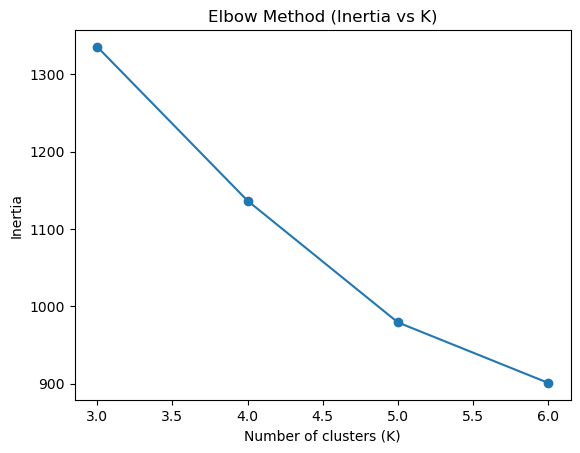

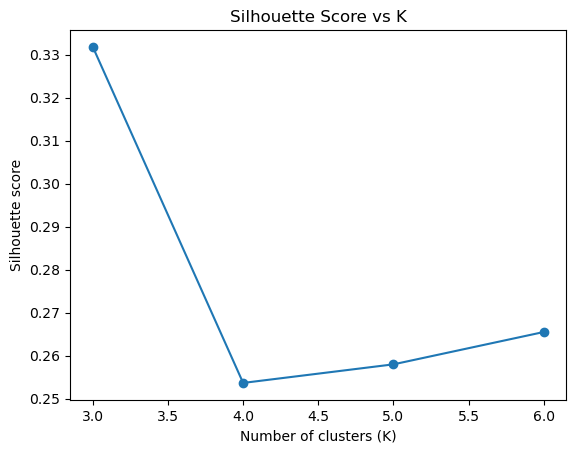

In [70]:

k_values = list(range(3, 7))

inertias = []
silhouettes = []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)

    # Silhouette requires at least 2 clusters and less than n_samples
    sil = silhouette_score(X_scaled, labels)
    silhouettes.append(sil)

# Plot Elbow
plt.figure()
plt.plot(k_values, inertias, marker="o")
plt.title("Elbow Method (Inertia vs K)")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Plot Silhouette
plt.figure()
plt.plot(k_values, silhouettes, marker="o")
plt.title("Silhouette Score vs K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette score")
plt.show()



In [71]:

# Pick K (you can change this after reviewing the plots)
K_FINAL = 4

kmeans = KMeans(n_clusters=K_FINAL, random_state=42, n_init=20)
kmeans_df["cluster"] = kmeans.fit_predict(X_scaled)

print("Cluster counts:")
print(kmeans_df["cluster"].value_counts().sort_index())

# 6) Cluster profiling 
# Profile using original (non-log) metrics + key engagement/fixation metrics
profile_cols = {
    "tickets": "sum",
    "num_escalation_flags": "sum",
    "distinct_features_used": "mean",
    "observed_mrr_2023_2024": "median",
    "total_usage_events": "mean",
}

cluster_profile = kmeans_df.groupby("cluster").agg(profile_cols)

cluster_profile

C:\Users\manis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster counts:
cluster
0    106
1    183
2     77
3    126
Name: count, dtype: int64


,tickets,num_escalation_flags,distinct_features_used,observed_mrr_2023_2024,total_usage_events
cluster,,,,,
0,394.0,14.0,19.622642,8838.0,282.301887
1,515.0,0.0,30.655738,25928.0,601.426230
2,365.0,81.0,30.038961,19006.0,561.311688
3,726.0,0.0,28.484127,20608.0,503.761905


In [72]:
# Add churn rate (interpretation only)
COL_CHURN = "churn_flag"
if COL_CHURN in kmeans_df.columns:
    kmeans_df[COL_CHURN] = pd.to_numeric(kmeans_df[COL_CHURN], errors="coerce")
    cluster_profile["churn_rate_%"] = kmeans_df.groupby("cluster")[COL_CHURN].mean() * 100

cluster_profile = cluster_profile.reset_index()
display(cluster_profile)

,cluster,tickets,num_escalation_flags,distinct_features_used,observed_mrr_2023_2024,total_usage_events,churn_rate_%
0,0,394.0,14.0,19.622642,8838.0,282.301887,20.754717
1,1,515.0,0.0,30.655738,25928.0,601.426230,23.497268
2,2,365.0,81.0,30.038961,19006.0,561.311688,24.675325
3,3,726.0,0.0,28.484127,20608.0,503.761905,19.047619


### Cluster Profile Interpretation
1. | Cluster | (Sum)Tickets | (sum)Escalations | (mean)Features Used | MRR (median)    | Usage (mean)  | Churn rate |
2. | 0       | Low  | medium         | Low        | Low  | Low | ~21%  | Low-Value,Low-Engagemnet 
3. | 1       | medium     | Low      | High       | High | High | ~23%  | High-Value, High-Engagement
4. | 2       | low  | high      | High          | medium    | High    | ~25%  |Medium-Value, High-Engagement, High escalations and highest churn 
5. | 3       | High    | low     | Medium        | medium    | medium  | ~19%  |Medium-Value, Medium-Engagement. High tickets, lower churn


In [73]:
kmeans_df['label'] = kmeans_df['cluster'].map({0:'Low-Value,Low-Engagemnet',1:'High-Value,High-Engagement',2:'Engaged,Friction-Prone',
                          3:'Support-Dependent,Loyal'})
kmeans_df['label']

0      High-Value,High-Engagement
1      High-Value,High-Engagement
2      High-Value,High-Engagement
3      High-Value,High-Engagement
4          Engaged,Friction-Prone
                  ...            
495      Low-Value,Low-Engagemnet
496      Low-Value,Low-Engagemnet
497      Low-Value,Low-Engagemnet
498      Low-Value,Low-Engagemnet
499      Low-Value,Low-Engagemnet
Name: label, Length: 492, dtype: object

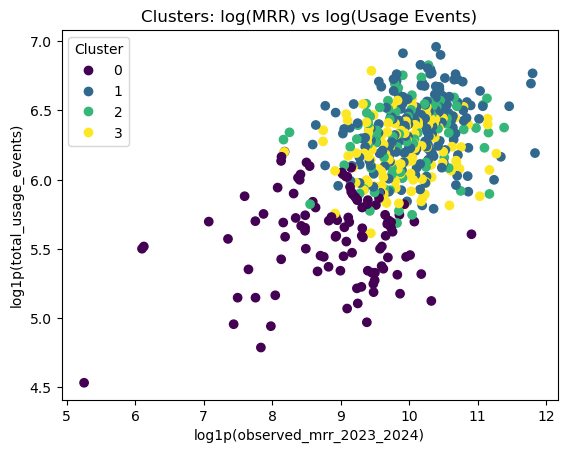

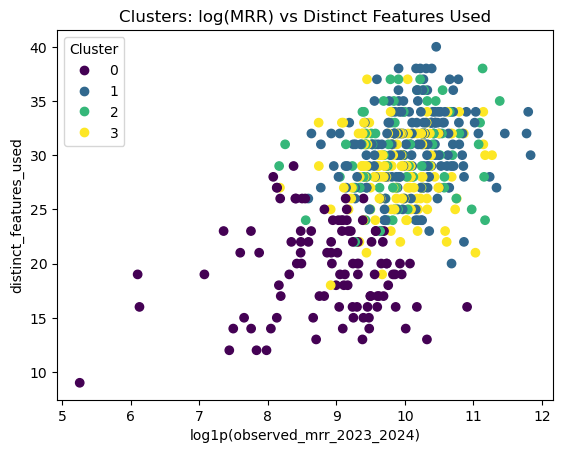

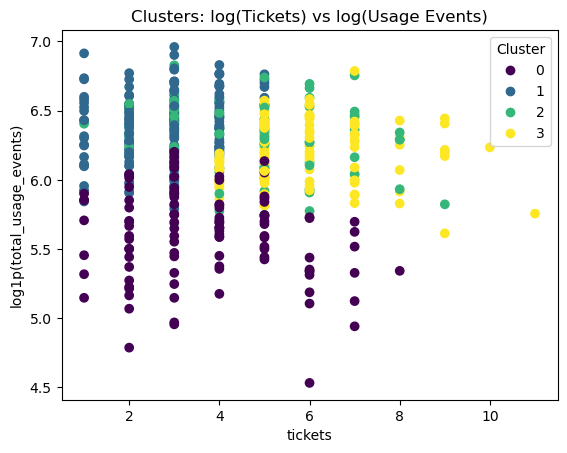

In [74]:

# -------------------------
# 7) Simple visualisations to interpret clusters
# -------------------------

# a) Value vs usage scatter (log scale features already prepared)
plt.figure()
scatter = plt.scatter(kmeans_df["log_mrr"], kmeans_df["log_usage"], c=kmeans_df["cluster"])
plt.title("Clusters: log(MRR) vs log(Usage Events)")
plt.xlabel("log1p(observed_mrr_2023_2024)")
plt.ylabel("log1p(total_usage_events)")
# Create legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Cluster")
plt.show()

# b) Value vs feature breadth
plt.figure()
scatter = plt.scatter(kmeans_df["log_mrr"], kmeans_df["distinct_features_used"],c=kmeans_df['cluster'])
plt.title("Clusters: log(MRR) vs Distinct Features Used")
plt.xlabel("log1p(observed_mrr_2023_2024)")
plt.ylabel("distinct_features_used")
# Create legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Cluster")
plt.show()

# c) Tickets vs usage (friction vs engagement)
plt.figure()
scatter = plt.scatter(kmeans_df["tickets"], kmeans_df["log_usage"], c=kmeans_df['cluster'])
plt.title("Clusters: log(Tickets) vs log(Usage Events)")
plt.xlabel("tickets")
plt.ylabel("log1p(total_usage_events)")
# Create legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Cluster")
plt.show()



## 2.Insights
The visualisations show clear separation for low-value, low-engagement customers, while higher-value segments overlap in two-dimensional projections. This indicates that churn risk among engaged customers is driven by factors beyond simple usage or revenue—specifically operational friction and customer experience.

Cluster 0 — Low-Value, Low-Engagement Customers : Churn here is largely explained by lack of product adoption and weak value realisation.
Cluster 1 — High-Value, Highly Engaged Customers : These customers show strong engagement and high value, but still experience non-trivial
churn, suggesting that engagement alone is not sufficient to guarantee retention.
Cluster 2 — Engaged but Friction-Prone Customers : This cluster represents the highest churn risk despite strong engagement, indicating that churn is driven primarily by product or support friction rather than lack of adoption.
Cluster 3 — Support-Dependent, Loyal Customers : These customers remain loyal when supported effectively, indicating that support investment is a key retention lever for this segment.

Customer churn cannot be explained by value or engagement alone. While low-value, low-engagement customers churn for expected adoption-related reasons, the highest churn risk emerges among highly engaged customers experiencing operational friction.

The analysis reveals two distinct engaged segments: one that remains stable with moderate support dependency, and another that exhibits elevated churn driven by escalations and unresolved issues. This explains why multiple high-value clusters overlap in usage and revenue visualisations but diverge in churn outcomes.

These findings indicate that improving product experience and support quality for engaged customers presents a higher retention ROI than focusing solely on increasing engagement.

This segmentation slightly confirms our initial hypothesis: churn risk isn't linear with account value. While high, low, and very high value bands experience 20-33% churn, our mid-tier customers prove most stable. This suggests we should prioritize retention investments in at-risk segments while protecting the loyalty drivers that keep mid-value accounts engaged.

#### Retention strategies:
1. Cluster 0 — Low-Value, Low-Engagement Customers : Retention ROI is limited; focus on scalable, low-touch interventions.
2. Cluster 1 — High-Value, Highly Engaged Customers : Proactive retention campaigns, Personalised communication
3. Cluster 2 — Engaged but Friction-Prone Customers(Highest priority): Priority issue resolution,Product quality improvements
4. Cluster 3 — Support-Dependent, Loyal Customers: Dedicated customer success support, SLA optimisation

In [75]:
kmeans_df

,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,is_trial,churn_flag,observed_mrr_2023_2024,...,total_usage_events,distinct_features_used,avg_events_per_feature,total_usage_duration_secs,feature_adoption_tier,start_date,log_mrr,log_usage,cluster,label
0,A-d4e0d4,Company_403,FinTech,US,2024-10-18,other,Basic,False,False,138060,...,488.0,30,9.959184,144771.0,High[<=30],2024-10-18,11.835451,6.192362,1,"High-Value,High-Engagement"
1,A-5b1bcd,Company_166,DevTools,US,2023-09-16,organic,Pro,False,False,133298,...,869.0,34,10.104651,251284.0,Very high[31+],2023-09-23,11.800350,6.768493,1,"High-Value,High-Engagement"
2,A-5a215a,Company_358,EdTech,FR,2024-01-05,other,Enterprise,False,False,130152,...,807.0,32,10.087500,271652.0,Very high[31+],2024-01-31,11.776466,6.694562,1,"High-Value,High-Engagement"
3,A-1f0636,Company_368,EdTech,AU,2024-01-01,partner,Pro,False,False,94710,...,685.0,32,10.073529,212120.0,Very high[31+],2024-02-27,11.458585,6.530878,1,"High-Value,High-Engagement"
4,A-4814a3,Company_337,Cybersecurity,IN,2024-09-17,event,Basic,False,True,87957,...,587.0,35,9.783333,168767.0,Very high[31+],2024-09-27,11.384615,6.376727,2,"Engaged,Friction-Prone"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,A-bf7919,Company_426,HealthTech,US,2024-11-27,organic,Pro,False,False,1560,...,262.0,23,10.076923,77458.0,High[<=30],2024-12-07,7.353082,5.572154,0,"Low-Value,Low-Engagemnet"
496,A-0be015,Company_454,FinTech,US,2024-10-15,event,Pro,False,False,1178,...,297.0,19,10.607143,88205.0,Moderate[<=20],2024-10-21,7.072422,5.697093,0,"Low-Value,Low-Engagemnet"
497,A-44dc83,Company_35,EdTech,FR,2024-05-12,other,Basic,False,False,456,...,248.0,16,10.333333,81119.0,Moderate[<=20],2024-06-17,6.124683,5.517453,0,"Low-Value,Low-Engagemnet"
498,A-1e6fc3,Company_434,EdTech,FR,2023-12-06,other,Pro,False,False,444,...,244.0,19,9.384615,85274.0,Moderate[<=20],2024-01-11,6.098074,5.501258,0,"Low-Value,Low-Engagemnet"


In [76]:
#saving the dataset into a csv file 
kmeans_df.to_excel('ravenstack_data.xlsx',index=False, sheet_name='act_subs')